This project seeks to address the classification problem of whether a browsing of an online shop results in a purchase or not. I will fit a simple logistic regression, gradient boosting classifier and a nonlinear support vector machine classifier to the data to try to predict if an online browsing results in a purchase. Nowadays many people choose to shop online than go to stores because it is convenient. For many online shops, identifying the relevant factors to when a customer makes a purchase online and the relative importance of each factor is a very useful information that can help choose what to put more resource in such as advertising. In my project, I will use the time of the year and whether a customer is a new or a returning visitor. For this project, I will use the Online Shoppers Purchasing Intention Dataset Data Set found at 
<br>
https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset# 
<br>
and the citation is 
<br>
Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks. Neural Comput & Applic 31, 6893–6908 (2019). https://doi.org/10.1007/s00521-018-3523-0 .
<br>
The dataset is from UCI Machine Learning Repository and it contains 12330 different data points from different users in a one year time period.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV

In [117]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

This tabulated data has 12330 rows and 18 columns, the memory usage is 1.5+ MB, 8 categorical and 10 numeric features, "SpecialDay" is a measure of how close the time is to a celebration day, "VisitorType" indicates whether a customer is a new or a returning visitor and "Revenue" is the variable I want to predict.

For this project, I am only interested in some features, so I will drop the features that I am not interested in.

In [118]:
delete = []
for i in range(len(data.columns)):
    if i < 9:
        delete.append(data.columns[i])
data.drop(columns=delete, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SpecialDay        12330 non-null  float64
 1   Month             12330 non-null  object 
 2   OperatingSystems  12330 non-null  int64  
 3   Browser           12330 non-null  int64  
 4   Region            12330 non-null  int64  
 5   TrafficType       12330 non-null  int64  
 6   VisitorType       12330 non-null  object 
 7   Weekend           12330 non-null  bool   
 8   Revenue           12330 non-null  bool   
dtypes: bool(2), float64(1), int64(4), object(2)
memory usage: 698.5+ KB


Now I inspect each feature to check if all of them are important to my analysis and drop if any feature is not.

In [119]:
data['SpecialDay']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12325    0.0
12326    0.0
12327    0.0
12328    0.0
12329    0.0
Name: SpecialDay, Length: 12330, dtype: float64

In [120]:
data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [121]:
data['OperatingSystems']
data.drop(columns=['OperatingSystems'], inplace=True)

In [122]:
data['Browser']
data.drop(columns=['Browser'], inplace=True)

In [123]:
data['Region']
data.drop(columns=['Region'], inplace=True)

In [124]:
data['TrafficType']
data.drop(columns=['TrafficType'], inplace=True)

In [125]:
data['VisitorType']

0        Returning_Visitor
1        Returning_Visitor
2        Returning_Visitor
3        Returning_Visitor
4        Returning_Visitor
               ...        
12325    Returning_Visitor
12326    Returning_Visitor
12327    Returning_Visitor
12328    Returning_Visitor
12329          New_Visitor
Name: VisitorType, Length: 12330, dtype: object

In [126]:
data['Weekend']

0        False
1        False
2        False
3        False
4         True
         ...  
12325     True
12326     True
12327     True
12328    False
12329     True
Name: Weekend, Length: 12330, dtype: bool

In [127]:
data['Revenue']

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Name: Revenue, Length: 12330, dtype: bool

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SpecialDay   12330 non-null  float64
 1   Month        12330 non-null  object 
 2   VisitorType  12330 non-null  object 
 3   Weekend      12330 non-null  bool   
 4   Revenue      12330 non-null  bool   
dtypes: bool(2), float64(1), object(2)
memory usage: 313.2+ KB


Now that I have the features I want in my analysis, I check each of them for potential issues before starting my analysis.

In [129]:
for col in data.columns:
    print(col, data[col].unique())

SpecialDay [0.  0.4 0.8 1.  0.2 0.6]
Month ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
VisitorType ['Returning_Visitor' 'New_Visitor' 'Other']
Weekend [False  True]
Revenue [False  True]


I see that VisitorType has 'Other' and let's inspect how many observations have 'Other'.

In [130]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Since the number of observations with 'Other' is not many and there is no clear way to impute values for these observations, I will drop rows with 'Other' as the visitor type.

In [131]:
indexes = []
for i in range(len(data)):
    if data['VisitorType'][i] == 'Other':
        indexes.append(i)
data.drop(index=indexes, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12245 entries, 0 to 12329
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SpecialDay   12245 non-null  float64
 1   Month        12245 non-null  object 
 2   VisitorType  12245 non-null  object 
 3   Weekend      12245 non-null  bool   
 4   Revenue      12245 non-null  bool   
dtypes: bool(2), float64(1), object(2)
memory usage: 406.6+ KB


To make later analysis easier, I will change the Dtypes of some of the features to int.

In [132]:
data['Weekend'] = data['Weekend'].astype(int)
data['Revenue'] = data['Revenue'].astype(int)
data.loc[data['VisitorType'] == 'Returning_Visitor', 'VisitorType'] = 1
data.loc[data['VisitorType'] == 'New_Visitor', 'VisitorType'] = 0
data.loc[data['Month'] == 'Feb', 'Month'] = 2
data.loc[data['Month'] == 'Mar', 'Month'] = 3
data.loc[data['Month'] == 'May', 'Month'] = 5
data.loc[data['Month'] == 'Oct', 'Month'] = 10
data.loc[data['Month'] == 'June', 'Month'] = 6
data.loc[data['Month'] == 'Jul', 'Month'] = 7
data.loc[data['Month'] == 'Aug', 'Month'] = 8
data.loc[data['Month'] == 'Nov', 'Month'] = 11
data.loc[data['Month'] == 'Sep', 'Month'] = 9
data.loc[data['Month'] == 'Dec', 'Month'] = 12
data['VisitorType'] = data['VisitorType'].astype(int)
data['Month'] = data['Month'].astype(int)

In [133]:
data.info()
for col in data.columns:
    print(col, data[col].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12245 entries, 0 to 12329
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SpecialDay   12245 non-null  float64
 1   Month        12245 non-null  int32  
 2   VisitorType  12245 non-null  int32  
 3   Weekend      12245 non-null  int32  
 4   Revenue      12245 non-null  int32  
dtypes: float64(1), int32(4)
memory usage: 382.7 KB
SpecialDay [0.  0.4 0.8 1.  0.2 0.6]
Month [ 2  3  5 10  6  7  8 11  9 12]
VisitorType [1 0]
Weekend [0 1]
Revenue [0 1]


To have a better idea of the dataset, let's visualize each column.

Text(0.5, 1.0, 'SpecialDay')

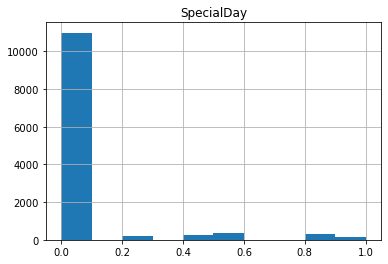

In [134]:
data['SpecialDay'].hist()
plt.title('SpecialDay')

From the histogram, I conclude that not many days are close to a special day which makes sense because most days in a year are not close to a special day.

Text(0.5, 1.0, 'Month')

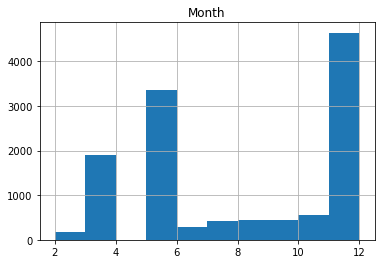

In [135]:
data['Month'].hist()
plt.title('Month')

In [136]:
data['Month'].value_counts()

5     3364
11    2976
3     1907
12    1665
10     549
9      448
8      433
7      432
6      287
2      184
Name: Month, dtype: int64

The months of January and April are missing in this dataset but I think this dataset is still useful to my analysis because all the other months are in the dataset.

In [137]:
data['VisitorType'].value_counts()

1    10551
0     1694
Name: VisitorType, dtype: int64

Most visitors are returning visitors.

In [138]:
data['Weekend'].value_counts()

0    9384
1    2861
Name: Weekend, dtype: int64

Most observations did not happen during the weekends.

In [139]:
data['Revenue'].value_counts()

0    10353
1     1892
Name: Revenue, dtype: int64

Most observations did not result in a purchase.

             SpecialDay     Month  VisitorType   Weekend   Revenue
SpecialDay     1.000000 -0.255738     0.083670 -0.017569 -0.082468
Month         -0.255738  1.000000    -0.094467  0.020197  0.127621
VisitorType    0.083670 -0.094467     1.000000 -0.046509 -0.104876
Weekend       -0.017569  0.020197    -0.046509  1.000000  0.029871
Revenue       -0.082468  0.127621    -0.104876  0.029871  1.000000


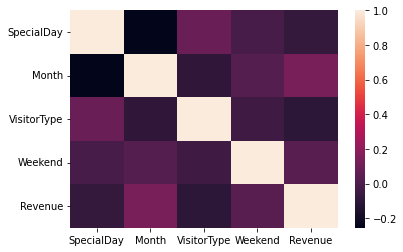

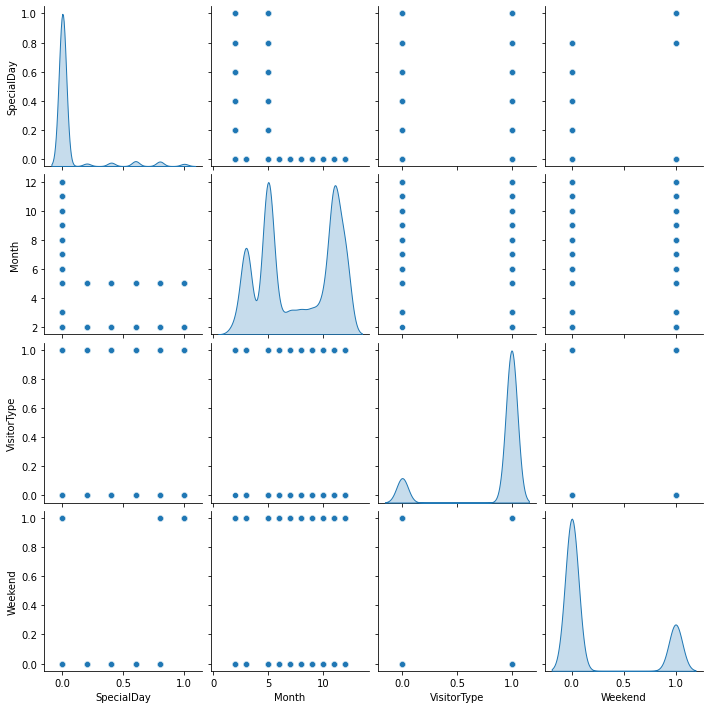

In [140]:
corr = data.corr()
print(corr)
sns.heatmap(corr)
sns.pairplot(data, vars = data.columns[:4], diag_kind = "kde")

From the correlation matrix, 'SpecialDay' has a negative correlation with 'Revenue'. 'SpecialDay' and 'Revenue' having a negative correlation is not expected, so I will do a linear regression and look at the significance of the coefficient.

In [141]:
model = smf.ols(formula = 'Revenue ~ SpecialDay', data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     83.84
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           6.22e-20
Time:                        11:50:16   Log-Likelihood:                -4871.8
No. Observations:               12245   AIC:                             9748.
Df Residuals:                   12243   BIC:                             9763.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1638      0.003     48.046      0.0

From the regression result, 'SpecialDay' has a statistically significant negative coefficient which I did not expect. This could be because a polynomial regression might work better since the adjusted r-squared is 0.007 in the result above.

# Models

## Logistic Regression Model

In [148]:
# prepare the data for a logistic regression model
X, y = data.loc[:,data.columns[:4]], data.loc[:,data.columns[4]]
print(X,y)

       SpecialDay  Month  VisitorType  Weekend
0             0.0      2            1        0
1             0.0      2            1        0
2             0.0      2            1        0
3             0.0      2            1        0
4             0.0      2            1        1
...           ...    ...          ...      ...
12325         0.0     12            1        1
12326         0.0     11            1        1
12327         0.0     11            1        1
12328         0.0     11            1        0
12329         0.0     11            0        1

[12245 rows x 4 columns] 0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12245, dtype: int32


In [149]:
# split the data into training and test sets with 5 percent of the data in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [150]:
# fit a logistic regression model on training set
logisticRegModel = LogisticRegression().fit(X_train, y_train)

In [151]:
# get the coefficients for the logistic regression model
print(logisticRegModel.coef_)
print(X_train.columns)

[[-1.07791858  0.09059698 -0.59595944  0.13088877]]
Index(['SpecialDay', 'Month', 'VisitorType', 'Weekend'], dtype='object')


Looking at the coefficients, I see that SpecialDay has a negative coefficient which agrees with the previous linear regression result.

In [152]:
# checking for multicollinearity in the logistic regression model
vif = [(variance_inflation_factor(X,i), X.columns[i]) for i in range(len(X.columns))]
print(vif)

[(1.130839658992564, 'SpecialDay'), (3.47774568456471, 'Month'), (3.646135228277374, 'VisitorType'), (1.2714056204278386, 'Weekend')]


The VIF is higher for the variables 'VisitorType' and 'Month', so I will do a linear regression on both to check if any of them should be dropped.

In [153]:
model = smf.ols(formula = 'VisitorType ~ SpecialDay + Weekend + Month', data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            VisitorType   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     60.60
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           7.00e-39
Time:                        11:58:05   Log-Likelihood:                -4262.6
No. Observations:               12245   AIC:                             8533.
Df Residuals:                   12241   BIC:                             8563.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9234      0.008    111.298      0.0

Since the adjusted r-squared is low, I decide to keep the variable 'VisitorType' in my analysis.

In [154]:
model = smf.ols(formula = 'Month ~ SpecialDay + Weekend + VisitorType', data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Month   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     311.5
Date:                Mon, 06 Mar 2023   Prob (F-statistic):          6.37e-195
Time:                        11:58:14   Log-Likelihood:                -31864.
No. Observations:               12245   AIC:                         6.374e+04
Df Residuals:                   12241   BIC:                         6.376e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.4800      0.082    103.639      

I choose to keep the variable 'Month' in my analysis because the adjusted r-squared is low.

In [155]:
# finding the mean accuracy of the model
logisticRegModel.score(X_test, y_test)

0.835236541598695

My logistic regression model has a mean accuracy of 0.835.

## Gradient Boosting Classifier

In [156]:
# fitting a gradient boosting classifier to the training data
gradientBoost = GradientBoostingClassifier(learning_rate = 0.05,\
                                           max_depth = 10,\
                                           max_features = 'sqrt',\
                                           subsample = 0.5)
print(gradientBoost.get_params())
gradientBoost.fit(X_train, y_train)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 0.5, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


GradientBoostingClassifier(learning_rate=0.05, max_depth=10,
                           max_features='sqrt', subsample=0.5)

In [157]:
# finding the mean accuracy of the gradient boosting classifier
gradientBoost.score(X_test, y_test)

0.835236541598695

My gradient boosting classifier has a mean accuracy of 0.835 which is the same as my logistic regression model. Now I will try changing the 'max_features' to 'None' and decreasing the learning rate to 0.01.

In [158]:
gradientBoost = GradientBoostingClassifier(learning_rate = 0.01,\
                                           max_depth = 10,\
                                           subsample = 0.5)
print(gradientBoost.get_params())
gradientBoost.fit(X_train, y_train)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 0.5, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


GradientBoostingClassifier(learning_rate=0.01, max_depth=10, subsample=0.5)

In [159]:
gradientBoost.score(X_test, y_test)

0.835236541598695

My gradient boosting classifier still has a mean accuracy of 0.835 which is the same as my logistic regression model.

In [160]:
print(gradientBoost.feature_importances_)
print(X_test.columns)

[0.07309647 0.65405634 0.19474642 0.07810077]
Index(['SpecialDay', 'Month', 'VisitorType', 'Weekend'], dtype='object')


## Nonlinear Support Vector Machine Classifier

In [161]:
# fitting a nonlinear support vector machine classifier to the training data
# searching for parameter values with the highest accuracy using K-Folds cross validation

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [i for i in range(3, 6)]
parameters = {"kernel":kernel, "degree":degree}
searchSVC = GridSearchCV(estimator = SVC(probability=True), param_grid=parameters, scoring = 'accuracy', cv = 5)
searchSVC.fit(X_train, y_train)
print(searchSVC.best_params_)
bestSVC = searchSVC.best_estimator_

{'degree': 3, 'kernel': 'linear'}


Using these results, I now know that linear kernel might work best.

In [162]:
# finding the mean accuracy of the nonlinear support vector machine classifier
bestSVC.score(X_test, y_test)

0.835236541598695

In [163]:
c = [np.log(x) for x in np.arange(np.exp(2**(-5)), np.exp(1)+1)]
gamma = [x for x in np.arange(2**(-5), 2)]
parameters = {"C":c, "gamma":gamma}
searchSVC = GridSearchCV(estimator = SVC(kernel='linear', probability=True), \
                         param_grid=parameters, scoring = 'accuracy', cv = 5)
searchSVC.fit(X_train, y_train)
print(searchSVC.best_params_)
bestSVC = searchSVC.best_estimator_

{'C': 0.03125000000000008, 'gamma': 0.03125}


In [164]:
# finding the mean accuracy of the nonlinear support vector machine classifier
bestSVC.score(X_test, y_test)

0.835236541598695

In [165]:
# weights for the features
print(bestSVC.coef_)
print(X_test.columns)

[[-2.91376628e-04 -4.15678203e-05  3.12650797e-05  3.12650797e-05]]
Index(['SpecialDay', 'Month', 'VisitorType', 'Weekend'], dtype='object')


Again, I get the same mean accuracy for the nonlinear support vector machine classifier, so I will use different evaluation metrics and visualizations for these different models.

In summary, I trained three different models on the data and got the same mean accuracy score for all three. Further evaluation metrics will show the differences between my logistic regression model, gradient boosting classifier and nonlinear support vector machine classifier. Looking at the feature importances for the gradient boosting classifier, month is the most important and I think the month variable seems to be the most important one because of the variation in the variable. While 'VisitorType' and 'Weekend' have only 0 and 1, 'Month' has 10 different values. The second most important feature is 'VisitorType'.

## Evaluation metrics and visualizations

For the evaluation metrics, I will evaluate my models using ROC curve, precision-recall curve, confusion matrix and cross validation score.

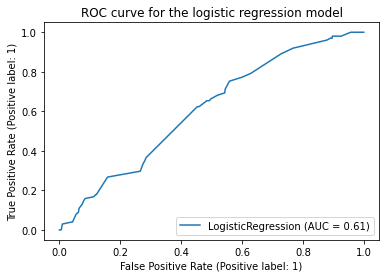

In [166]:
# ROC curve for the logistic regression model
RocCurveDisplay.from_estimator(logisticRegModel, X_test, y_test)
plt.title('ROC curve for the logistic regression model')
plt.show()

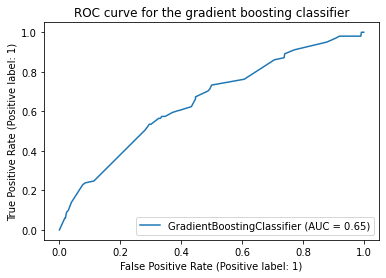

In [167]:
# ROC curve for the gradient boosting classifier
RocCurveDisplay.from_estimator(gradientBoost, X_test, y_test)
plt.title('ROC curve for the gradient boosting classifier')
plt.show()

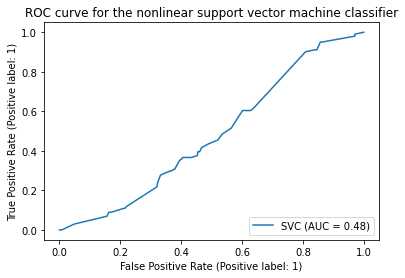

In [168]:
# ROC curve for the nonlinear support vector machine classifier
RocCurveDisplay.from_estimator(bestSVC, X_test, y_test)
plt.title('ROC curve for the nonlinear support vector machine classifier')
plt.show()

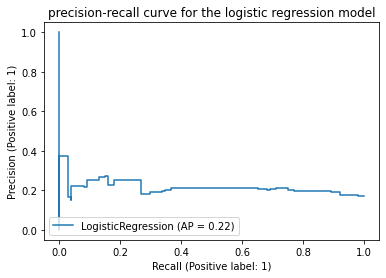

In [169]:
# precision-recall curve for the logistic regression model
PrecisionRecallDisplay.from_estimator(logisticRegModel, X_test, y_test)
plt.title('precision-recall curve for the logistic regression model')
plt.show()

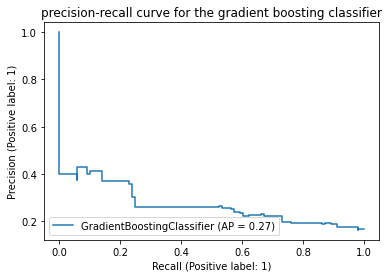

In [170]:
# precision-recall curve for the gradient boosting classifier
PrecisionRecallDisplay.from_estimator(gradientBoost, X_test, y_test)
plt.title('precision-recall curve for the gradient boosting classifier')
plt.show()

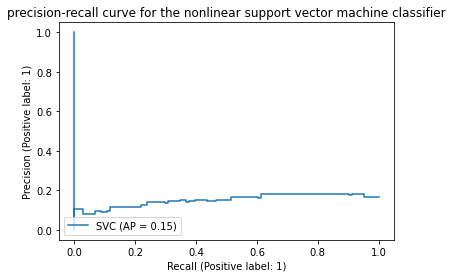

In [171]:
# precision-recall curve for the nonlinear support vector machine classifier
PrecisionRecallDisplay.from_estimator(bestSVC, X_test, y_test)
plt.title('precision-recall curve for the nonlinear support vector machine classifier')
plt.show()

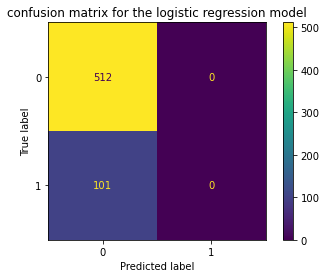

In [172]:
# confusion matrix for the logistic regression model
ConfusionMatrixDisplay.from_estimator(logisticRegModel, X_test, y_test)
plt.title('confusion matrix for the logistic regression model')
plt.show()

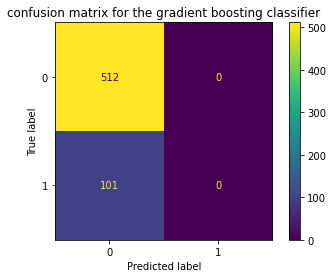

In [173]:
# confusion_matrix for the gradient boosting classifier
ConfusionMatrixDisplay.from_estimator(gradientBoost, X_test, y_test)
plt.title('confusion matrix for the gradient boosting classifier')
plt.show()

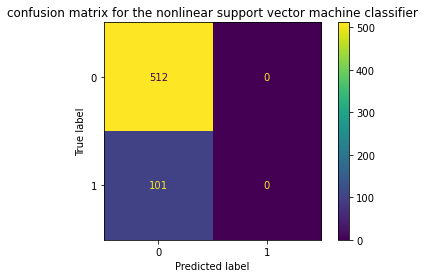

In [174]:
# confusion_matrix for the nonlinear support vector machine classifier
ConfusionMatrixDisplay.from_estimator(bestSVC, X_test, y_test)
plt.title('confusion matrix for the nonlinear support vector machine classifier')
plt.show()

In [175]:
# cross validation score for the logistic regression model
print(cross_val_score(logisticRegModel, X, y, cv=10))
# cross validation score for the gradient boosting classifier
print(cross_val_score(gradientBoost, X, y, cv=10))
# cross validation score for the nonlinear support vector machine classifier
print(cross_val_score(bestSVC, X, y, cv=10))

[0.84571429 0.84571429 0.84571429 0.84489796 0.84489796 0.84558824
 0.84558824 0.84558824 0.84558824 0.84558824]
[0.84571429 0.84571429 0.84571429 0.84489796 0.84489796 0.84558824
 0.84558824 0.84558824 0.84558824 0.84558824]
[0.84571429 0.84571429 0.84571429 0.84489796 0.84489796 0.84558824
 0.84558824 0.84558824 0.84558824 0.84558824]


From the evaluation metrics, my gradient boosting classifier has the best performance out of the three, followed by my logistic regression model. I will try to improve the performance of my gradient boosting classifier by decreasing the learning rate to 0.005 and setting subsample to 0.1 and evaluate the new model.

## Gradient Boosting Classifier

In [176]:
gradientBoost = GradientBoostingClassifier(learning_rate = 0.005,\
                                           max_depth = 10,\
                                           subsample = 0.1)
gradientBoost.fit(X_train, y_train)
print(gradientBoost.score(X_test, y_test))
print(gradientBoost.feature_importances_)
print(X_test.columns)

0.835236541598695
[0.09912184 0.58852142 0.16978328 0.14257346]
Index(['SpecialDay', 'Month', 'VisitorType', 'Weekend'], dtype='object')


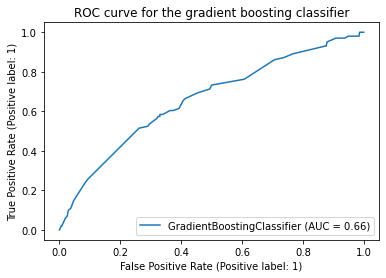

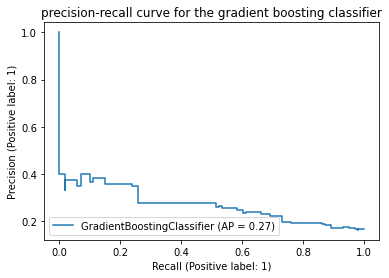

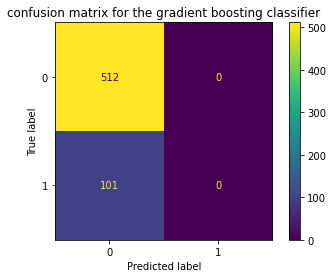

[0.84571429 0.84571429 0.84571429 0.84489796 0.84489796 0.84558824
 0.84558824 0.84558824 0.84558824 0.84558824]


In [177]:
# evaluation metrics and visualizations for the gradient boosting classifier
# ROC curve for the gradient boosting classifier
RocCurveDisplay.from_estimator(gradientBoost, X_test, y_test)
plt.title('ROC curve for the gradient boosting classifier')
plt.show()
# precision-recall curve for the gradient boosting classifier
PrecisionRecallDisplay.from_estimator(gradientBoost, X_test, y_test)
plt.title('precision-recall curve for the gradient boosting classifier')
plt.show()
# confusion_matrix for the gradient boosting classifier
ConfusionMatrixDisplay.from_estimator(gradientBoost, X_test, y_test)
plt.title('confusion matrix for the gradient boosting classifier')
plt.show()
# cross validation score for the gradient boosting classifier
print(cross_val_score(gradientBoost, X, y, cv=10))

Looking at the ROC curves, the previous gradient boosting classifier had an AUC of 0.65 and the new gradient boosting classifier has an AUC of 0.66 which is a slight improvement in the model performance.

# Discussion and Conclusion

Results of my models do not support the idea that special days have the biggest effect on whether a customer makes a purchase online or not. The most important features to consider are the month and whether the customer is a new or returning visitor. All three of my models had the same mean accuracy score. For my gradient boosting classifier, changing the learning rate and the subsample did not result in a considerable improvement in my original gradient boosting classifier and this may be because the dataset was missing the months of January and April. Including the months of January and April may improve my model performances.

My GitHub repository link for this project is https://github.com/uch-b/project .